## Inicialización

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import numpy as np

## Cargar los Datos

In [ ]:
games = pd.read_csv('/datasets/games.csv')

## Preparación de datos

In [ ]:
games.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Es más que claro que existen valores ausentes dentro de las columnas así como también se necesita cambiar el tipo de datos en la columna ```Year_of_Release``` a int64. Consideraría el cambiar también ```User_Score``` y ```Rating``` a float64 pero prefiero eliminar los datos ausentes, colocando un 0. Los valores ausentes muy probablemente fueron causados porque no se registraron *scores* por los críticos.

In [ ]:
games.columns = games.columns.str.lower()

# Convertir user_score a numérico ANTES de llenar valores nulos
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

# Ahora llenar los valores ausentes
games['critic_score'] = games['critic_score'].fillna(0)
games['user_score'] = games['user_score'].fillna(0)  # ← Ahora ya es numérico
games['rating'] = games['rating'].fillna('Unknown')  # ← Rating debería ser string

games = games.dropna(subset=["year_of_release"])
games = games.astype({'year_of_release': 'int64'})


display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Unknown


In [ ]:
games['global_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Unknown,31.38


## Analisis de Datos

### Mira cuántos juegos fueron lanzados en diferentes años.

In [ ]:
release_per_year = games['year_of_release'].value_counts().sort_index()
display(release_per_year.head())

1980     9
1981    46
1982    36
1983    17
1984    14
Name: year_of_release, dtype: int64

In [ ]:
average = release_per_year.mean()
significant = release_per_year[release_per_year >= average]

print(significant)

2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


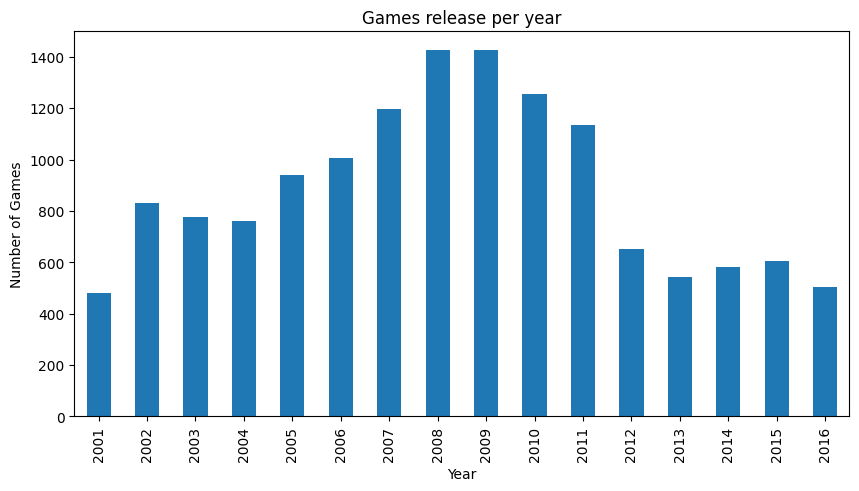

In [ ]:
significant.plot(kind="bar", figsize=(10,5))
plt.title("Games release per year")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.show()

### ¿Son significativos los datos de cada período?

Es significante la cantidad de juegos que se hicieron desde el 2007 a 2011, superando los 1400 juegos en el 2008 y el 2009.

### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [ ]:
sales_per_platform = games.groupby('platform')['global_sales'].sum().sort_values(ascending=False)

print('Ventas totales por plataform (Mayor a menor):')
display(sales_per_platform.head(10))

Ventas totales por plataform (Mayor a menor):


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: global_sales, dtype: float64

Aquí podemos ver las ventas totales por plataforma, dándonos a ver qué PS2 lleva la delantera junto con el Xbox 360 y la PS3.

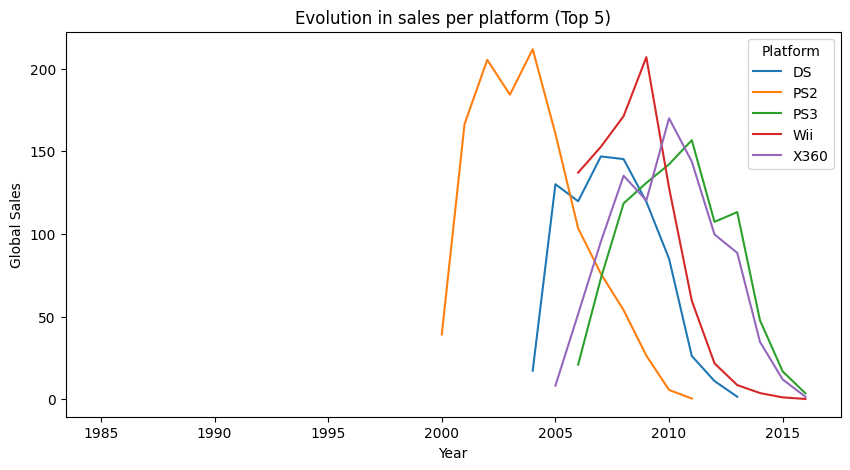

In [ ]:
top_platforms = sales_per_platform.head(5).index
evolution = games[games['platform'].isin(top_platforms)].groupby(['year_of_release', 'platform'])['global_sales'].sum().unstack()

#Grafica
evolution.plot(figsize=(10,5))
plt.title('Evolution in sales per platform (Top 5)')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend(title='Platform')
plt.show()

En esta gráfica se puede ver el crecimiento de las top cinco plataformas por año según las ventas.

In [ ]:
last_year = games['year_of_release'].max()
last_use = games.groupby('platform')['year_of_release'].max()

dead_platforms = last_use[last_use < last_year]
print(dead_platforms.sort_values)

<bound method Series.sort_values of platform
2600    1989
3DO     1995
DC      2008
DS      2013
GB      2001
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2002
NES     1994
NG      1996
PCFX    1996
PS      2003
PS2     2011
PSP     2015
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
XB      2008
Name: year_of_release, dtype: int64>


Siendo el Atari 2600 el primero en la lista ya que su último título fue lanzado en 1989.

In [ ]:
debut = games.groupby('platform')['year_of_release'].min()
closure = games.groupby('platform')['year_of_release'].max()

life_cycle = (closure - debut).sort_values(ascending=False)

print(life_cycle.head(10))
life_cycle.mean()

platform
PC      31
DS      28
GB      13
X360    11
PSP     11
PS2     11
NES     11
DC      10
Wii     10
PS3     10
Name: year_of_release, dtype: int64


7.612903225806452

Plataformas grandes duran entre 8 a 12 años, siendo la PC (El computador) el que tiene un mayor ciclo de vida.

### Modelo para el 2017

In [ ]:
ent_16 = games[games['year_of_release'] <= 2016]
ent_17 = games[games['year_of_release'] <= 2017].copy()

# Calculo promedio ventas x plataforma
averages = ent_16.groupby('platform')['global_sales'].mean()

# Creación de columna (corregido: usar ent_17, no ent_16)
ent_17['pred_sales'] = ent_17['platform'].map(averages)

# Si no existía, rellenar con media global
global_mean = ent_16['global_sales'].mean()
ent_17['pred_sales'].fillna(global_mean, inplace=True)

# Error
rmse = (((ent_17['global_sales'] - ent_17['pred_sales'])**2).mean())**0.5
print(f"Error RMSE en 2017: {rmse:.2f}")
print(ent_17[["name", "platform", "global_sales", "pred_sales"]].head())

Error RMSE en 2017: 1.53
                       name platform  global_sales  pred_sales
0                Wii Sports      Wii         82.54    0.692986
1         Super Mario Bros.      NES         40.24    2.561735
2            Mario Kart Wii      Wii         35.52    0.692986
3         Wii Sports Resort      Wii         32.77    0.692986
4  Pokemon Red/Pokemon Blue       GB         31.38    2.622990


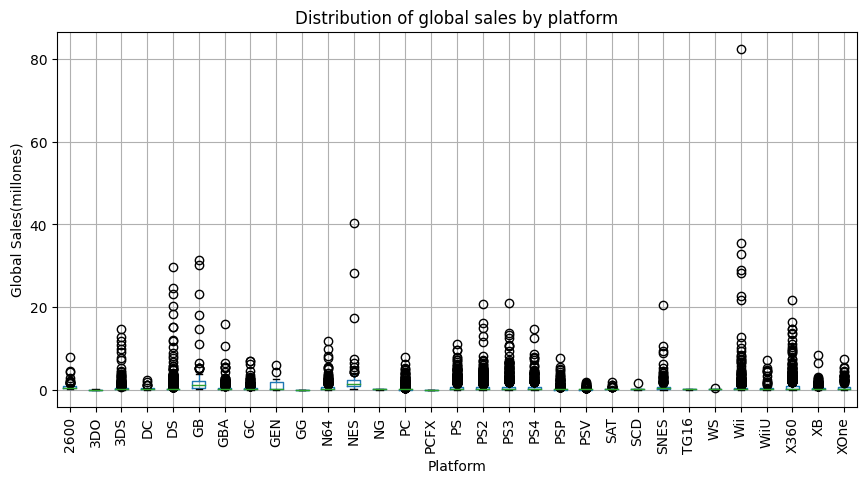

In [ ]:
games.boxplot(column='global_sales', by='platform', figsize=(10,5), rot=90)
plt.title("Distribution of global sales by platform")
plt.suptitle("")  # Quita el título extra automático
plt.xlabel("Platform")
plt.ylabel("Global Sales(millones)")
plt.show()

En casi todas las consolas aparecen outliers muy grandes (superventas), que elevan mucho la escala. Esto confirma que la industria del videojuego tiene una distribución muy desigual: ***muchos juegos venden poco, unos pocos venden muchísimo.*** Las consolas más populares históricamente tienen **“megahits”** que distorsionan sus distribuciones.

In [ ]:
platform_choice = 'PS2'
games_ps2 = games[games['platform'] == platform_choice].copy()

games_ps2['user_score'] = pd.to_numeric(games_ps2['user_score'], errors='coerce')
games_ps2['critic_score'] = pd.to_numeric(games_ps2['critic_score'], errors='coerce')

# Eliminamos filas con valores nulos
games_ps2['user_score'] = games_ps2['user_score'].dropna(0)
games_ps2['critic_score'] = games_ps2['critic_score'].dropna(0)


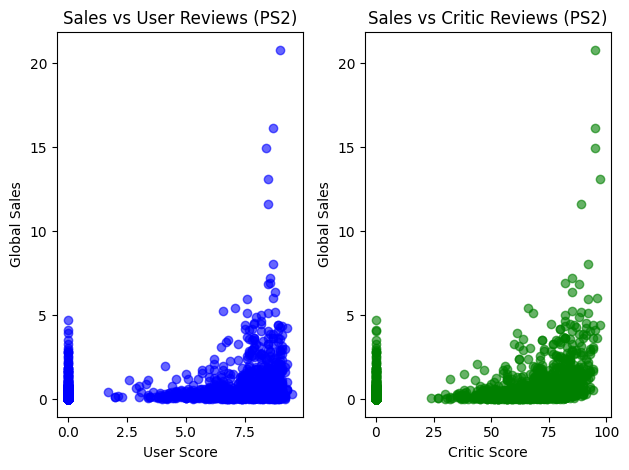

In [ ]:

# User Score x Global Sales
plt.subplot(1,2,1)
plt.scatter(games_ps2['user_score'], games_ps2['global_sales'], color='blue', alpha=0.6)
plt.title('Sales vs User Reviews (PS2)')
plt.xlabel('User Score')
plt.ylabel('Global Sales')

# Critic Score x Global Sales
plt.subplot(1,2,2)
plt.scatter(games_ps2['critic_score'], games_ps2['global_sales'], color='green', alpha=0.6)
plt.title('Sales vs Critic Reviews (PS2)')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')

plt.tight_layout()
plt.show()


La dispersión de los datos indica que las puntuaciones no son el único factor que determina el éxito en ventas de un videojuego, también sugieren una correlación positiva entre las puntuaciones y la ventas (tanto de usuarios como de críticos).

In [ ]:
platform_choice = 'DS'
games_ds = games[games['platform'] == platform_choice].copy()

games_ds['user_score'] = pd.to_numeric(games_ds['user_score'], errors='coerce')
games_ds['critic_score'] = pd.to_numeric(games_ds['critic_score'], errors='coerce')

# Eliminamos filas con valores nulos

games_ds['user_score'] = games_ds['user_score'].dropna(0.0)
games_ds['critic_score'] = games_ds['critic_score'].dropna(0.0)


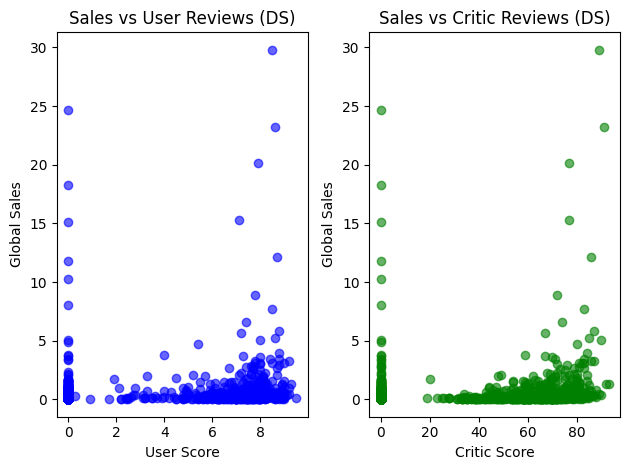

In [ ]:
# User Score x Global Sales
plt.subplot(1,2,1)
plt.scatter(games_ds['user_score'], games_ds['global_sales'], color='blue', alpha=0.6)
plt.title('Sales vs User Reviews (DS)')
plt.xlabel('User Score')
plt.ylabel('Global Sales')

# Critic Score x Global Sales
plt.subplot(1,2,2)
plt.scatter(games_ds['critic_score'], games_ds['global_sales'], color='green', alpha=0.6)
plt.title('Sales vs Critic Reviews (DS)')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')

plt.tight_layout()
plt.show()


Para el DS, nuevamente vemos una correlación positiva entre las puntuaciones y las ventas. Lo que significa que los juegos mejor calificados son los que más se venden, pero este sigue sin ser el principal factor para el éxito de las ventas.

In [ ]:
genre_sales = games.groupby('genre')['global_sales'].agg(['count', 'sum', 'mean']).sort_values(by='sum', ascending=False)
display(genre_sales)

,count,sum,mean
genre,,,
Action,3307,1716.52,0.519057
Sports,2306,1309.67,0.567940
Shooter,1296,1041.36,0.803519
Role-Playing,1481,931.08,0.628683
Platform,878,825.55,0.940262
Misc,1721,790.29,0.459204
Racing,1226,723.49,0.590122
Fighting,837,442.66,0.528865
Simulation,857,387.96,0.452695


Con esto podemos ver que los géneros más altos son los de **acción** y los de **deporte**, así como los de *aventura, estrategia y puzzle* son los que menos se venden. Aunque, es importante notar que, si bien el género de Acción tiene la mayor suma total de ventas, esto se debe en gran parte a la gran cantidad de títulos lanzados. Así como los de ventas más bajas suelen ser menos populares o de nicho.

## Perfiles de Usuario para cada Region

In [ ]:

games_reg = games.copy()

for c in ['na_sales', 'eu_sales', 'jp_sales']:
    games_reg[c] = pd.to_numeric(games_reg[c], errors='coerce').fillna(0).clip(lower=0)

def top5_with_share(games, group_col, region_col):
    tot = games[region_col].sum()  # ← Agregar paréntesis aquí
    tbl = (games.groupby(group_col, as_index=False)[region_col]
          .sum()
          .sort_values(region_col, ascending=False)
          .head(5))
    tbl['share_%'] = 100 * tbl[region_col] / tot if tot > 0 else 0
    tbl.insert(1, 'region', region_col.replace('_sales', ''))
    return tbl

regions = ['na_sales', 'eu_sales', 'jp_sales']

top_platforms = pd.concat([top5_with_share(games_reg, 'platform', r) for r in regions], ignore_index=True)
print("\nTop-5 plataformas por región con cuota (% del total regional):")
display(top_platforms)


Top-5 plataformas por región con cuota (% del total regional):


,platform,region,na_sales,share_%,eu_sales,jp_sales
0,X360,na,595.74,13.716614,NaN,NaN
1,PS2,na,572.92,13.191195,NaN,NaN
2,Wii,na,486.87,11.209937,NaN,NaN
3,PS3,na,390.13,8.982547,NaN,NaN
4,DS,na,380.31,8.756447,NaN,NaN
5,PS2,eu,NaN,13.858371,332.63,NaN
6,PS3,eu,NaN,13.632557,327.21,NaN
7,X360,eu,NaN,11.179022,268.32,NaN
8,Wii,eu,NaN,10.762392,258.32,NaN
9,PS,eu,NaN,8.848809,212.39,NaN


In [ ]:
plat_any_top5 = (games_reg.groupby('platform')[regions].sum()
                 .stack().reset_index()
                 .rename(columns={'level_1':'region',0:'sales'}))
plat_any_top5['region'] = plat_any_top5['region'].str.replace('_sales','', regex=False)

names = (pd.concat([top_platforms[top_platforms['region']==r.replace('_sales','')]['platform'] for r in regions])
         .drop_duplicates())
plat_pivot = (plat_any_top5[plat_any_top5['platform'].isin(names)]
              .assign(share=lambda d: d.groupby('region')['sales'].transform(lambda x: x / x.sum() * 100))
              .pivot(index='platform', columns='region', values='share').fillna(0).round(2))
print("\nCuotas (%) comparadas de las plataformas top (por región):")
display(plat_pivot)


Cuotas (%) comparadas de las plataformas top (por región):


region,eu,jp,na
platform,,,
3DS,3.67,12.13,2.85
DS,11.30,21.10,13.09
PS,12.74,16.85,11.52
PS2,19.95,16.58,19.72
PS3,19.62,9.57,13.43
SNES,1.14,14.05,2.11
Wii,15.49,8.23,16.76
X360,16.09,1.48,20.51


Cada región parece mostrar una preferencia por plataformas de marcas locales, por ejemplo, en Norteamérica, hay una fuerte competencia entre Xbox y PlayStation, mientras que en Europa PlayStation domina. En Japón el mercado está casi completamente dominado por Nintendo y Sony.

In [ ]:
top_genres = pd.concat([top5_with_share(games_reg, 'genre', r) for r in regions], ignore_index=True)
print("\nTop-5 géneros por región con cuota (% del total regional):")
display(top_genres)


Top-5 géneros por región con cuota (% del total regional):


,genre,region,na_sales,share_%,eu_sales,jp_sales
0,Action,na,863.17,19.874056,NaN,NaN
1,Sports,na,671.20,15.454043,NaN,NaN
2,Shooter,na,584.83,13.465417,NaN,NaN
3,Platform,na,444.44,10.233008,NaN,NaN
4,Misc,na,399.57,9.199899,NaN,NaN
5,Action,eu,NaN,21.289387,510.99,NaN
6,Sports,eu,NaN,15.470730,371.33,NaN
7,Shooter,eu,NaN,13.103853,314.52,NaN
8,Racing,eu,NaN,9.769562,234.49,NaN
9,Misc,eu,NaN,8.774232,210.60,NaN


Se muestra una gran división cultural en los géneros de videojuegos. Mientras que los mercados occidentales (Norteamérica y Europa) se inclinan más hacia los juegos de acción, deporte y shooters, el mercado japonés tiene preferencias por los juegos de rol.

In [ ]:
def esrb_table(df, region_col):
    t = (df.groupby('rating')
           .agg(total_sales=(region_col,'sum'),
                avg_sales=(region_col,'mean'),
                n_titles=(region_col,'count'))
           .sort_values('total_sales', ascending=False))
    t['region'] = region_col.replace('_sales','')
    return t.reset_index()

esrb_by_region = pd.concat([esrb_table(games_reg, r) for r in regions], ignore_index=True)
print("\nESRB por región (ventas TOTAL, PROMEDIO y conteo):")
display(esrb_by_region)


ESRB por región (ventas TOTAL, PROMEDIO y conteo):


,rating,total_sales,avg_sales,n_titles,region
0,E,1274.24,0.324978,3921,na
1,Unknown,1227.62,0.183830,6678,na
2,T,747.60,0.257349,2905,na
3,M,742.89,0.483652,1536,na
4,E10+,345.50,0.248026,1393,na
5,K-A,2.56,0.853333,3,na
6,EC,1.53,0.191250,8,na
7,AO,1.26,1.260000,1,na
8,RP,0.00,0.000000,1,na
9,E,703.87,0.179513,3921,eu


Si, la clasificación de la ESRB parece afectar las ventas, y existe una influencia significativa entre regiones. América y Europa muestran patrones similares, con las clasificaciones E y T en ventas totales, mientras que la clasificación M tiene un alto promedio de ventas por título. En Japón el mercado se inclina mucho más hacia las clasificaciones E y T, y las ventas de juegos con la clasificación M son algo bajas pero las tres tienen una rentabilidad baja en la clasificación E10+.

### Prueba de Hipotesis

In [ ]:
df_h = games.copy()
df_h['user_score'] = pd.to_numeric(df_h['user_score'], errors='coerce')

# Filtrar datos válidos
df_h = df_h.dropna(subset=['user_score'])

# ---------- Hipótesis 1: Xbox One vs PC ----------
xone_scores = df_h[df_h['platform'] == 'XOne']['user_score']
pc_scores   = df_h[df_h['platform'] == 'PC']['user_score']

# t-test de medias (asumiendo varianzas diferentes por seguridad -> Welch’s t-test)
t_stat1, p_val1 = stats.ttest_ind(xone_scores, pc_scores, equal_var=False, nan_policy='omit')

print("Hipótesis 1: Xbox One vs PC")
print(f"T = {t_stat1:.3f}, p = {p_val1:.3f}")
if p_val1 < 0.05:
    print("Rechazamos H₀: las medias son diferentes.\n")
else:
    print("No rechazamos H₀: no hay evidencia suficiente de que las medias sean diferentes.\n")


Hipótesis 1: Xbox One vs PC
T = -3.446, p = 0.001
Rechazamos H₀: las medias son diferentes.



Esto significa que hay evidencia suficiente para concluir que las calificaciones promedio de los usarios para ambas plataformas son diferentes.

In [ ]:
action_scores  = df_h[df_h['genre'] == 'Action']['user_score']
sports_scores  = df_h[df_h['genre'] == 'Sports']['user_score']

t_stat2, p_val2 = stats.ttest_ind(action_scores, sports_scores, equal_var=False, nan_policy='omit')

print("Hipótesis 2: Action vs Sports")
print(f"T = {t_stat2:.3f}, p = {p_val2:.3f}")
if p_val2 < 0.05:
    print("Rechazamos H₀: las medias son diferentes.\n")
else:
    print("No rechazamos H₀: no hay evidencia suficiente de que las medias sean diferentes.\n")

Hipótesis 2: Action vs Sports
T = 5.796, p = 0.000
Rechazamos H₀: las medias son diferentes.



Y esto, indique hay evidencia suficiente para concluir que las calificaciones promedio de los usuarios para los generos de Acción y Deportes son diferentes.

### Conclusiones

En la industria de los videojuegos tiene una distribución de ventas *desiguales*, donde unos pocos juegos venden muchísimo mientras que los demás venden poco. Las calificaciones (en general) tienen una **correlación positiva** con las ventas, aunque no son el único factor que determina el éxito ya que existe una clara *división cultural y regional* en las preferencias (Japón prefiere juegos y consolas locales, así como en Norteamérica). En el lado *occidental* los géneros más populares son de **acción, deporte y shooters**, mientras que en *japón* dominan los **juegos de rol**, también esto se refleja muchísimo en las clasificaciones por edad (ESRB) donde las ventas para público maduro **(M)** son mucho más bajas en japón que en regiones occidentales.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Muy bien con estas conclusiones. Entre los puntos más importantes para el pronóstico de 2017 están las plataformas que serán relevantes, la segmentación de géneros por importancia de ventas y la caracterización de cada región. Para realizar una predicción del siguiente año se podría considerar cada segmento por separado para ajustar diferentes modelos.
    
Podrías mejorar tus conclusiones incluyendo algunos valores de las métricas más importantes, así las afirmaciones realizadas estarían mejor apoyadas en hechos.
    
</div>